Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

Load Dataset

In [11]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Preprocess Data

In [15]:
# Drop non-numeric columns or encode them
df = df.drop(['id'], axis=1)  # Remove ID if present
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Encode diagnosis

# Check for missing values
df = df.dropna()

# Features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Standardize the features

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dimensionality Reduction for visualization (PCA to 2D)

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

 Train/Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Train Linear SVM

In [19]:
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred))

Linear SVM Accuracy: 0.9912280701754386


Visualize Decision Boundary (Linear SVM)

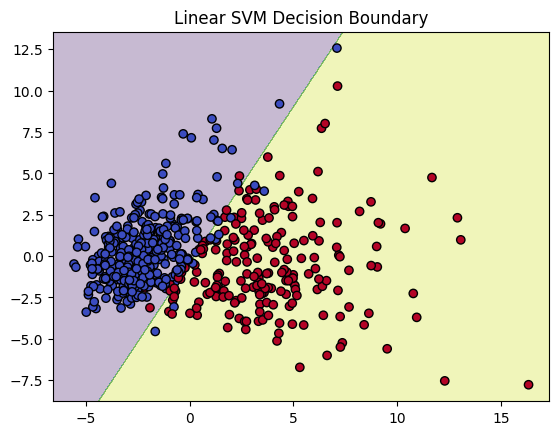

In [20]:
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

plot_decision_boundary(linear_svm, X_pca, y, "Linear SVM Decision Boundary")

RBF Kernel SVM

In [21]:
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
print("RBF Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF Kernel SVM Accuracy: 0.9649122807017544


Visualize RBF Kernel Decision Boundary

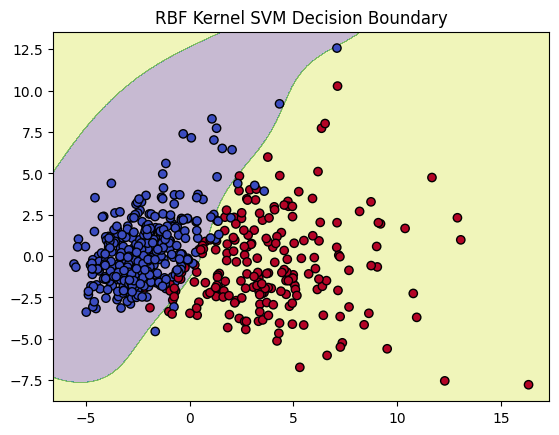

In [22]:
plot_decision_boundary(rbf_svm, X_pca, y, "RBF Kernel SVM Decision Boundary")

Hyperparameter Tuning (Grid Search)

In [23]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
print("Best parameters found:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Best parameters found: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-val accuracy: 0.9362637362637363


Cross-validation Accuracy

In [24]:
cv_scores = cross_val_score(SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma']),
                            X_scaled, y, cv=5)
print("Cross-validated accuracy scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validated accuracy scores: [0.97368421 0.97368421 0.97368421 0.96491228 0.98230088]
Mean CV Accuracy: 0.9736531594472908
